Viewing A Two Dimensional FFT2 in Python

In [1]:
import numpy
import scipy
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

In [2]:
im = imageio.imread('/home/brandon/Pictures/GSzfringe.gif')

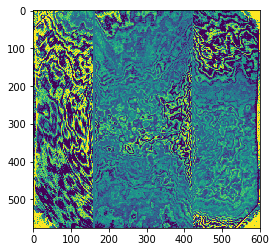

In [3]:
# plot an image
plt.imshow(im)

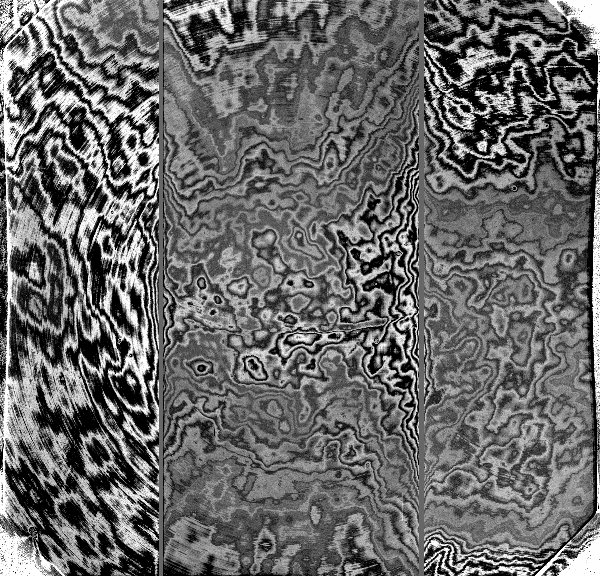

In [4]:
# Show an image inline within a Jupyter notebook
Image("/home/brandon/Pictures/GSzfringe.gif")

In [5]:
f = numpy.fft.fft2(im, norm="ortho") #remember, if you do filtering on the fft2, this is the one you'd work with

In [6]:
def fftreal(f):
    return f.real

def fftimag(f):
    return f.imag



# Prepare for viewing

# This will convert complex numbers to floats and select the real and imaginary parts.
def viewfft2(f):
    fp = abs(f)


    # The following two lines are for the sake of Histogram equalization. This is the dirtiest implementation imaginable. 
    # We use the mean as the maximum value since the max of an fft2 is usually an outlier.
    mx = fp.mean()
    mn = fp.min()


    # Shift for viewing
    fps = numpy.fft.fftshift(fp)
    
    plt.imshow(fps, vmin=mn, vmax=mx)
    
    plt.show()

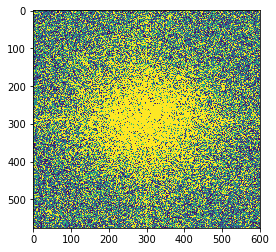

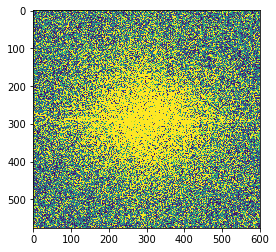

In [7]:
# go for it
viewfft2(f.real)
viewfft2(f.imag)


We can now attempt to build a model of the original image. A model will omit certain pieces of information deemed unnecessary to represent the object. In this case, our model will omit frequencies and phases which are "not strong" in comparison to others, i.e. they fall below a threshold value.

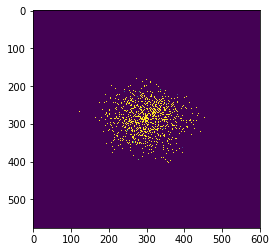

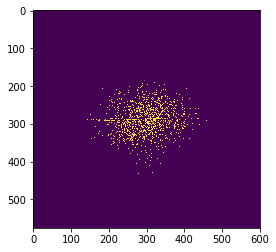

In [8]:
# grab the frequency and phase information from f
fp = fftreal(f)
pp = fftimag(f)

# threshold values 
fpc = numpy.clip(fp, 100.0, fp.max())
ppc = numpy.clip(pp, 100.0, pp.max())

viewfft2(fpc)
viewfft2(ppc)


Now we need to combine the frequency and phase information before taking the Inverse FFT2.

In [9]:
# combine 
A = fpc[:,:] + 1j * ppc[:,:]


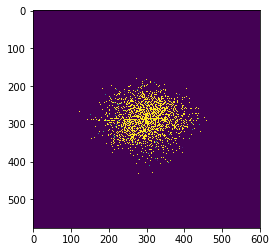

In [10]:
viewfft2(A)

We can view the model in the spatial domain

In [11]:
spatial = numpy.fft.ifft2(A)

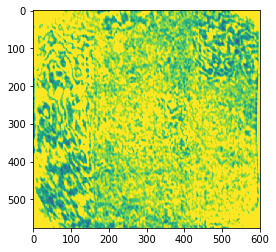

In [12]:
plt.imshow(abs(spatial), vmin=0.0, vmax=0.2)

"spatial" is a model of the original image. Hopefully, it doesn't contain as much information as the original. As for finding structure, the lower and mid frequencies look like an elliptical blob.